In [3]:
from Py6S import *

In [4]:
import spectral
img_file = r"D:\SIH stuff\f111116t01p00r22rdn_c\f111116t01p00r22rdn_c_sc01_ort_img"
img = spectral.envi.open(r"D:\SIH stuff\f111116t01p00r22rdn_c\f111116t01p00r22rdn_c_sc01_ort_img.hdr", r"D:\SIH stuff\f111116t01p00r22rdn_c\f111116t01p00r22rdn_c_sc01_ort_img")
print(img)

	Data Source:   'D:\SIH stuff\f111116t01p00r22rdn_c\f111116t01p00r22rdn_c_sc01_ort_img'
	# Rows:           2135
	# Samples:         769
	# Bands:           224
	Interleave:        BIP
	Quantization:  16 bits
	Data format:     int16


In [5]:
nrows, ncols, nbands = img.shape
print(f"Number of rows (height): {nrows}")
print(f"Number of columns (width): {ncols}")

Number of rows (height): 2135
Number of columns (width): 769


In [6]:
row, col = 100, 150
pixel_spectrum = img[row, col, :] 
print(f"Spectrum at pixel ({row}, {col}):", pixel_spectrum)

band = 10
band_data = img.read_band(band) 
print(f"Data for band {band}:", band_data)


Spectrum at pixel (100, 150): [[[ 571  659  735 1018 1543 1666 1604 1594 1784 1884 1897 1849 1820 1762
   1721 1698 1647 1671 1694 1688 1646 1605 1610 1548 1561 1546 1511 1457
   1473 1426 1400 1429 1381 1425 1394 1235 1211 1272 1174 1011 1147 1277
   1232  745 1153 1217 1139 1103  989  835  891  986 1001  985  976  956
    903  703  613  570  490  234  220  312  525  603  722  747  732  732
    712  699  682  654  629  608  566  523  416  260   69   64  106  101
    212  326  355  351  372  364  395  413  437  435  407  339  406  344
    340  383  376  324  267  215  136   83    7    3    1    2    0    0
      2   11   15   25   60   87   65  108  231  341  420  473  501  516
    532  515  455  469  485  452  450  482  473  444  439  431  418  417
    403  387  368  346  321  301  287  255  205  139   86   26    3    1
      1    2    0    0    0    0    0    0    0    0    0    0    0    2
      4   10   57  121  144   66   19   55  157  207  149  115  132  191
    211  219  225  21

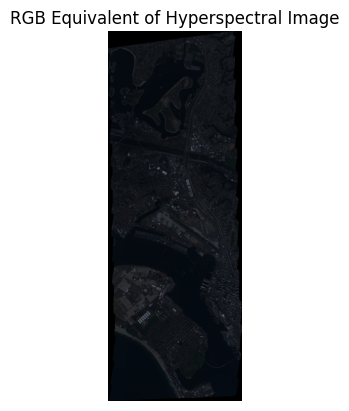

In [7]:
import matplotlib.pyplot as plt

rgb_bands = [30, 19, 11]
rgb_img = spectral.get_rgb(img, rgb_bands)

plt.imshow(rgb_img)
plt.title('RGB Equivalent of Hyperspectral Image')
plt.axis('off')
plt.show()


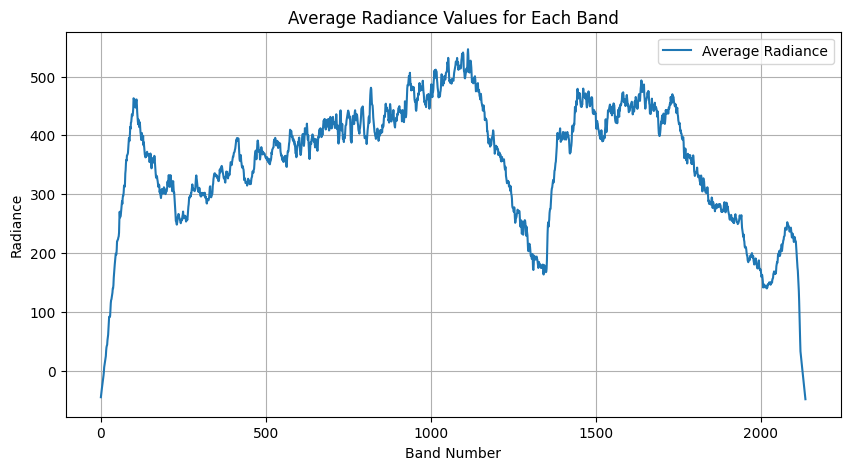

In [9]:
import numpy as np
img_data = img.load() 
bands, rows, cols = img_data.shape
average_radiance = []

for band in range(bands):
    band_data = img_data[band, :, :]
    mean_radiance = np.mean(band_data)
    average_radiance.append(mean_radiance)

band_numbers = range(1, bands + 1)
plt.figure(figsize=(10, 5))
plt.plot(band_numbers, average_radiance, label='Average Radiance')
plt.xlabel('Band Number')
plt.ylabel('Radiance')
plt.title('Average Radiance Values for Each Band')
plt.grid(True)
plt.legend()
plt.show()

In [52]:
def read_radiance_file(file_path, hdr_path):
    samples, lines, bands, data_type = None, None, None, None
    with open(hdr_path, 'r') as hdr_file:
        hdr_lines = hdr_file.readlines()
        for line in hdr_lines:
            if 'samples' in line:
                samples = int(line.split('=')[1].strip())
            elif 'lines' in line:
                lines = int(line.split('=')[1].strip())
            elif 'bands' in line:
                bands = int(line.split('=')[1].strip())
            elif 'data type' in line:
                data_type = int(line.split('=')[1].strip())

    dtype_map = {
        1: np.uint8,
        2: np.int16,
        3: np.int32,
        4: np.float32,
        5: np.float64
    }
    dtype = dtype_map.get(data_type, np.int16)
    
    with open(file_path, 'rb') as bin_file:
        data = np.fromfile(bin_file, dtype=dtype)
    
    data = data.reshape((bands, lines, samples))
    
    return data

In [75]:
radiance_file = r"D:\SIH stuff\f111116t01p00r22rdn_c\f111116t01p00r22rdn_c_sc01_ort_img"
hdr_file = r"D:\SIH stuff\f111116t01p00r22rdn_c\f111116t01p00r22rdn_c_sc01_ort_img.hdr"
radiance_data = read_radiance_file(radiance_file, hdr_file)

In [76]:
radiance_data_float64 = radiance_data.astype(np.float64)
min_value = radiance_data_float64.min()
max_value = radiance_data_float64.max()
radiance_data_normalized = (radiance_data_float64 - min_value) / (max_value - min_value)
radiance_data_normalized = radiance_data_normalized.astype(np.float32)
radiance_data_normalized

array([[[0.30963683, 0.30963683, 0.30963683, ..., 0.30963683,
         0.30963683, 0.30963683],
        [0.30963683, 0.30963683, 0.30963683, ..., 0.30963683,
         0.30963683, 0.30963683],
        [0.30963683, 0.30963683, 0.30963683, ..., 0.30963683,
         0.30963683, 0.30963683],
        ...,
        [0.30963683, 0.30963683, 0.30963683, ..., 0.30963683,
         0.30963683, 0.30963683],
        [0.30963683, 0.30963683, 0.30963683, ..., 0.30963683,
         0.30963683, 0.30963683],
        [0.30963683, 0.30963683, 0.30963683, ..., 0.30963683,
         0.30963683, 0.30963683]],

       [[0.30963683, 0.30963683, 0.30963683, ..., 0.30963683,
         0.30963683, 0.30963683],
        [0.30963683, 0.30963683, 0.30963683, ..., 0.30963683,
         0.30963683, 0.30963683],
        [0.30963683, 0.30963683, 0.30963683, ..., 0.30963683,
         0.30963683, 0.30963683],
        ...,
        [0.30963683, 0.30963683, 0.30963683, ..., 0.30963683,
         0.30963683, 0.30963683],
        [0.3

In [77]:
print("Radiance Data Shape:", radiance_data.shape)
print("Wavelengths Length:", len(wavelengths))
print("Sample Wavelengths:", wavelengths[:5]) 
print("Sample Radiance Data:", radiance_data[:, :, 0].mean()) 


Radiance Data Shape: (224, 2135, 769)
Wavelengths Length: 224
Sample Wavelengths: [365.9298, 375.594, 385.2625, 394.9355, 404.6129]
Sample Radiance Data: 731.9221269655403


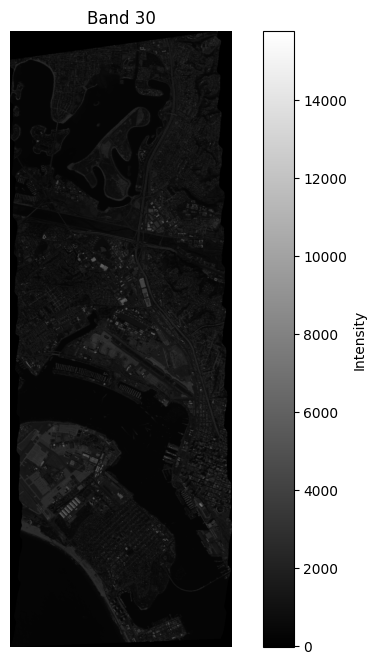

In [78]:
from osgeo import gdal

file_path = r"D:\SIH stuff\f111116t01p00r22rdn_c\f111116t01p00r22rdn_c_sc01_ort_img"
dataset = gdal.Open(file_path)
if dataset is None:
    raise FileNotFoundError(f"Unable to open file {file_path}")
bands_count = dataset.RasterCount
band_number = 30
if band_number <= bands_count:
    band = dataset.GetRasterBand(band_number)
    band_data = band.ReadAsArray()
else:
    raise IndexError(f"Band number {band_number} out of range")
plt.figure(figsize=(8, 8))
plt.imshow(band_data, cmap='gray')
plt.colorbar(label='Intensity')
plt.title(f'Band {band_number}')
plt.axis('off')
plt.show()


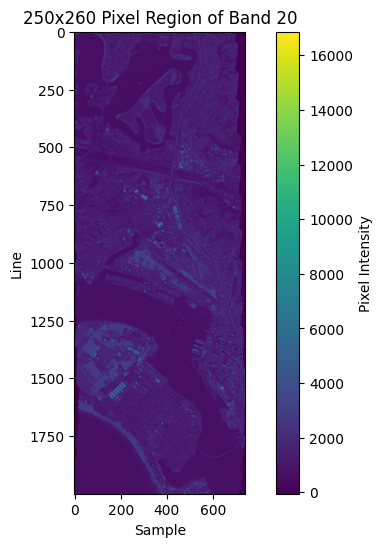

In [79]:
band_index = 19
band = dataset.GetRasterBand(band_index + 1)

band20_data = band.ReadAsArray()

start_line = 100
end_line = start_line + 2000
start_sample = 20
end_sample = start_sample + 740

region_of_interest = band20_data[start_line:end_line, start_sample:end_sample]

plt.figure(figsize=(8, 6))
plt.imshow(region_of_interest)
plt.colorbar(label='Pixel Intensity')
plt.title('250x260 Pixel Region of Band 20')
plt.xlabel('Sample')
plt.ylabel('Line')
plt.show()

     Spectral Channel  Radiance
0                   1       500
1                   2       604
2                   3       661
3                   4       976
4                   5      1540
..                ...       ...
219               220        70
220               221        41
221               222        16
222               223         1
223               224         3

[224 rows x 2 columns]


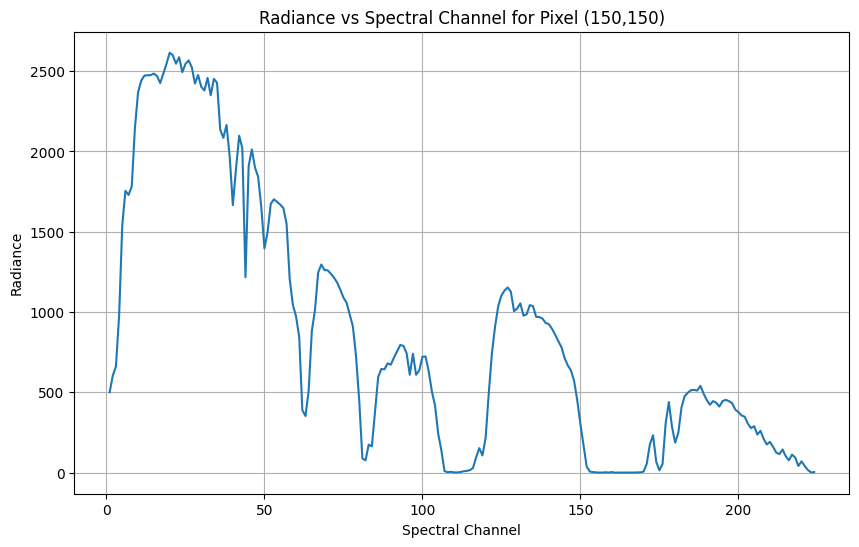

In [80]:
import pandas as pd
num_bands = dataset.RasterCount
x, y = 149, 149
spectral_data = []

for band_index in range(num_bands):
    band = dataset.GetRasterBand(band_index + 1)
    pixel_value = band.ReadAsArray(x, y, 1, 1)[0, 0]
    spectral_data.append(pixel_value)

spectral_data = np.array(spectral_data)
df = pd.DataFrame({
    'Spectral Channel': range(1, num_bands + 1),
    'Radiance': spectral_data
})
print(df)
plt.figure(figsize=(10, 6))
plt.plot(df['Spectral Channel'], df['Radiance'])
plt.title('Radiance vs Spectral Channel for Pixel (150,150)')
plt.xlabel('Spectral Channel')
plt.ylabel('Radiance')
plt.grid(True)
plt.show()

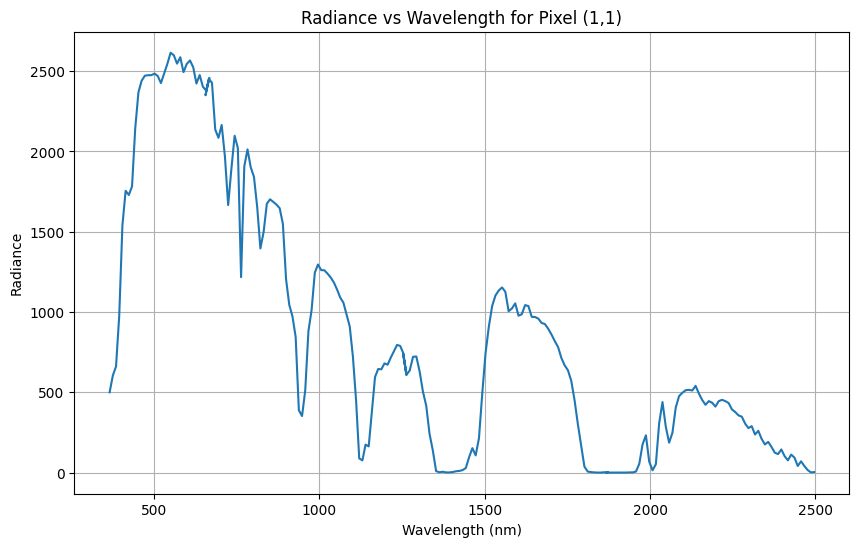

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, df['Radiance'])
plt.title('Radiance vs Wavelength for Pixel (1,1)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Radiance')
plt.grid(True)
plt.show()

In [10]:
s = SixS()
print(dir(s))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__version__', '__weakref__', '_create_aot_vis_lines', '_create_atmos_aero_lines', '_create_atmos_corr_lines', '_create_elevation_lines', '_create_geom_lines', '_create_ground_reflectance_lines', '_create_wavelength_lines', '_find_path', '_refls_to_string', '_which', 'aero_profile', 'altitudes', 'aot550', 'atmos_corr', 'atmos_profile', 'geometry', 'ground_reflectance', 'max_wv', 'min_wv', 'outputs', 'produce_debug_report', 'run', 'sixs_path', 'test', 'visibility', 'wavelength', 'write_input_file']


In [11]:
switcher_atmos = {
    "NoGaseousAbsorption": AtmosProfile.NoGaseousAbsorption,
    "Tropical": AtmosProfile.Tropical,
    "MidlatitudeSummer": AtmosProfile.MidlatitudeSummer,
    "MidlatitudeWinter": AtmosProfile.MidlatitudeWinter,
    "SubarcticSummer": AtmosProfile.SubarcticSummer,
    "SubarcticWinter": AtmosProfile.SubarcticWinter,
    "USStandard1962": AtmosProfile.USStandard1962
}
atmos_prof = input('Enter the atmospheric profile from the following options: NoGaseousAbsorption/Tropical/MidlatitudeSummer/MidlatitudeWinter/SubarcticSummer/SubarcticWinter/USStandard1962')
if atmos_prof in switcher_atmos:
    s.atmos_profile = AtmosProfile.PredefinedType(switcher_atmos[atmos_prof])
else:
    print("Invalid atmospheric profile entered.")

Enter the atmospheric profile from the following options: NoGaseousAbsorption/Tropical/MidlatitudeSummer/MidlatitudeWinter/SubarcticSummer/SubarcticWinter/USStandard1962 MidlatitudeSummer


In [12]:
switcher_aero = {"NoAerosols": AeroProfile.NoAerosols,
    "Continental": AeroProfile.Continental,
    "Maritime": AeroProfile.Maritime,
    "Urban": AeroProfile.Urban,
    "Desert": AeroProfile.Desert,
    "BiomassBurning": AeroProfile.BiomassBurning,
    "Stratospheric": AeroProfile.Stratospheric
}
aero_prof = input('Enter the aerosol profile from the following options: NoAerosols/Continental/Maritime/Urban/Desert/BiomassBurning/Stratospheric')
if aero_prof in switcher_aero:
    s.atmos_profile = AeroProfile.PredefinedType(switcher_aero[aero_prof])
else:
    print("Invalid aerosol profile entered.")

Enter the aerosol profile from the following options: NoAerosols/Continental/Maritime/Urban/Desert/BiomassBurning/Stratospheric Urban


In [14]:
visibility = float(input('Enter the visibility: '))
s.visibility = visibility

Enter the visibility:  15


In [15]:
latitude = float(input('Enter the latitude of the place in degrees: '))
longitude = float(input('Enter the longitude of the place in degrees: '))
flight_date = input('Enter the flight date in dd-mm-yyyy format: ')
day, month, year = flight_date.split('-')
day = int(day)
month = int(month)

flight_time = input('Enter the flight time in hh:mm:ss format: ')
time_parts = list(map(int, flight_time.split(':')))
decimal_time = time_parts[0] + time_parts[1]/60 + time_parts[2]/3600

s.geometry = Geometry.Landsat_TM()

s.geometry.month = month
s.geometry.day = day
s.geometry.gmt_decimal_hour = decimal_time  
s.geometry.latitude = latitude
s.geometry.longitude = longitude

Enter the latitude of the place in degrees:  32.76
Enter the longitude of the place in degrees:  -199.215
Enter the flight date in dd-mm-yyyy format:  11-11-2016
Enter the flight time in hh:mm:ss format:  20:39:00


In [16]:
sensor_altitude = float(input('Enter the sensor altitude: '))
ground_elevation = float(input('Enter the ground elevation: '))
pixel_size = float(input('Enter the pixel size: '))

s.altitudes.set_target_custom_altitude(ground_elevation)
s.altitudes.set_sensor_custom_altitude(sensor_altitude)


Enter the sensor altitude:  20
Enter the ground elevation:  0
Enter the pixel size:  7.5


In [17]:
s.wavelength = Wavelength(0.42, 4)

In [18]:
s.ground_reflectance = GroundReflectance.HomogeneousLambertian(0.6)

Running for many wavelengths - this may take a long time


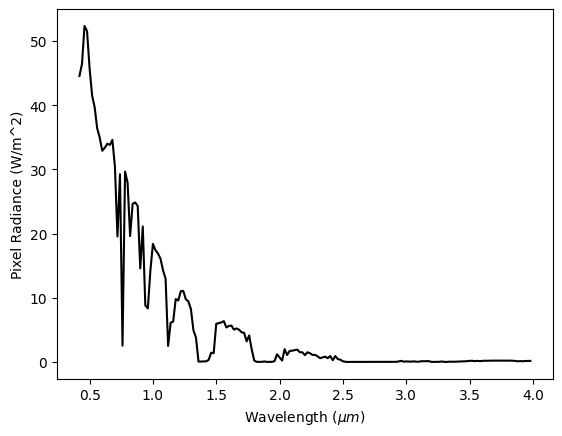

In [19]:
import numpy as np
wv, res = SixSHelpers.Wavelengths.run_wavelengths(s, np.arange(0.42, 4, 0.02), output_name='apparent_radiance')
SixSHelpers.Wavelengths.plot_wavelengths(wv, res, 'Pixel Radiance (W/m^2)')

Enter the solar zenith angle:  53.9
Enter the solar azimuth angle:  199.56


Running for many angles - this may take a long time


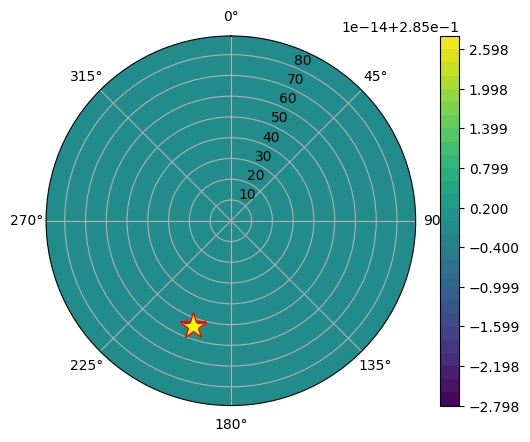

(<Figure size 640x480 with 2 Axes>, <PolarAxes: >)

In [68]:
solar_zenith = float(input('Enter the solar zenith angle: '))
solar_azimuth = float(input('Enter the solar azimuth angle: '))
s.geometry.solar_a = solar_azimuth
s.geometry.solar_z = solar_zenith

SixSHelpers.Angles.run_and_plot_360(s, 'view', 'pixel_reflectance')

In [20]:
s.run()
apparent_reflectance = s.outputs.apparent_reflectance
atmospheric_transmittance = s.outputs.transmittance_total_scattering
path_radiance = s.outputs.atmospheric_intrinsic_reflectance

print("Apparent Reflectance:", apparent_reflectance)
print("Atmospheric Transmittance:", atmospheric_transmittance)
print("Path Radiance:", path_radiance)

Apparent Reflectance: 0.3437616
Atmospheric Transmittance: Downward: 0.569050, Upward: 0.933560, Total: 0.531240
Path Radiance: 0.086


In [54]:
wavelengths = [365.9298,375.5940,385.2625,394.9355,404.6129,414.2946,423.9808,433.6713,443.3662,453.0655,462.7692,472.4773,482.1898,491.9066,501.6279,511.3535,521.0836,530.8180,540.5568,550.3000,560.0477,569.7996,579.5560,589.3168,599.0819,608.8515,618.6254,628.4037,638.1865,647.9736,657.7651,667.5610,655.7923,665.5994,675.4012,685.1979,694.9894,704.7756,714.5566,724.3325,734.1031,743.8685,753.6287,763.3837,773.1335,782.8781,792.6174,802.3516,812.0805,821.8043,831.5228,841.2361,850.9442,860.6471,870.3448,880.0372,889.7245,899.4066,909.0834,918.7551,928.4214,938.0827,947.7387,957.3895,967.0351,976.6755,986.3106,995.9406,1005.565,1015.185,1024.799,1034.408,1044.012,1053.611,1063.204,1072.793,1082.376,1091.954,1101.526,1111.094,1120.656,1130.213,1139.765,1149.311,1158.853,1168.389,1177.920,1187.446,1196.966,1206.482,1215.992,1225.497,1234.996,1244.491,1253.980,1263.464,1253.373,1263.346,1273.318,1283.291,1293.262,1303.234,1313.206,1323.177,1333.148,1343.119,1353.089,1363.060,1373.030,1383.000,1392.969,1402.939,1412.908,1422.877,1432.845,1442.814,1452.782,1462.750,1472.718,1482.685,1492.652,1502.619,1512.586,1522.552,1532.518,1542.484,1552.450,1562.416,1572.381,1582.346,1592.311,1602.275,1612.240,1622.204,1632.167,1642.131,1652.094,1662.057,1672.020,1681.983,1691.945,1701.907,1711.869,1721.831,1731.792,1741.753,1751.714,1761.675,1771.635,1781.596,1791.556,1801.515,1811.475,1821.434,1831.393,1841.352,1851.310,1861.269,1871.227,1872.384,1866.864,1876.925,1886.985,1897.042,1907.096,1917.148,1927.198,1937.246,1947.292,1957.335,1967.375,1977.414,1987.450,1997.484,2007.515,2017.545,2027.572,2037.596,2047.619,2057.639,2067.656,2077.672,2087.685,2097.696,2107.704,2117.710,2127.714,2137.716,2147.715,2157.712,2167.707,2177.699,2187.689,2197.677,2207.662,2217.645,2227.626,2237.604,2247.581,2257.554,2267.526,2277.495,2287.462,2297.427,2307.389,2317.349,2327.307,2337.262,2347.216,2357.167,2367.115,2377.061,2387.005,2396.947,2406.886,2416.823,2426.758,2436.690,2446.620,2456.548,2466.473,2476.396,2486.317,2496.236]
print(len(wavelengths))
red_band = -1
green_band = -1
blue_band = -1
for index, value in enumerate(wavelengths):
    if value == 657.7651:
        red_band = index
    elif value == 550.3:
        green_band = index
    elif value == 472.4773:
        blue_band = index

print(red_band)
print(green_band)
print(blue_band)

224
30
19
11


In [59]:
print(radiance_data.shape)
print(radiance_data[15, :, :])

(224, 2135, 769)
[[-12545 -12545 -12545 ... -12545 -12545 -12545]
 [-12545 -12545 -12545 ... -12545 -12545 -12545]
 [-12545 -12545 -12545 ... -12545 -12545 -12545]
 ...
 [-15357 -26877 -30973 ... -25599 -28927  29953]
 [ 24833  18945  10753 ... -28412  22788  14596]
 [  7940   6148  13572 ...      0   1024      0]]


In [60]:
L_path = []
E_sun = []
T_total = []

for index, wavelen in enumerate(wavelengths):
    if wavelen/1000 > 4 or wavelen/1000 < 0.2:
        continue
    s.wavelength = Wavelength(wavelen/1000)
    s.run()
    L_path.append(s.outputs.atmospheric_intrinsic_radiance)
    E_sun.append(s.outputs.direct_solar_irradiance)
    T_total.append(s.outputs.transmittance_total_scattering.total)

print("L_path:", L_path)
print("E_sun:", E_sun)
print("T_total:", T_total)


L_path: [14.508, 12.914, 11.348, 11.256, 19.705, 20.837, 19.259, 18.137, nan, 21.374, 20.431, 19.633, 18.261, 17.517, 16.12, 15.178, 13.987, 13.832, 12.696, nan, 11.096, 10.34, 10.214, nan, 9.21, 8.957, 8.875, 8.706, 8.767, 8.451, 8.155, 8.511, 8.06, 8.555, 8.416, 8.184, 7.001, 7.651, 7.183, 6.155, 6.575, 6.88, 6.721, 2.124, 6.326, 6.219, 5.854, 5.678, 5.048, 3.622, 4.174, 4.929, 4.777, nan, 4.619, 4.657, 4.422, 2.984, 3.016, 3.961, 3.233, 0.962, 1.297, 1.744, 2.732, 2.788, 3.14, 3.324, 3.209, 3.114, 3.041, 2.961, 2.872, 2.798, 2.712, 2.587, 2.582, 2.035, 2.138, 1.494, 0.545, 1.084, 1.075, 0.547, 1.08, 1.615, 1.363, 1.649, 1.738, 1.499, 1.566, 1.729, 1.728, 1.681, 1.59, 1.409, 1.62, 1.409, 1.39, 1.434, 1.332, 1.058, 0.891, 0.837, 0.538, 0.327, 0.061, 0.055, 0.054, 0.05, 0.047, 0.046, 0.051, 0.051, 0.035, 0.058, 0.257, 0.268, 0.066, 0.251, 0.426, 0.664, 0.787, 0.863, 0.834, 0.808, 0.824, 0.811, 0.613, 0.737, 0.769, 0.605, 0.63, 0.718, 0.682, 0.624, 0.603, 0.643, 0.619, 0.603, 0.578, 0.5

In [27]:
import math

L_path_mean_arr = []
for i, val in enumerate(L_path):
    if not math.isnan(val):
        L_path_mean_arr.append(val)

E_sun_mean_arr = []
for i, val in enumerate(E_sun):
    if not math.isnan(val):
        E_sun_mean_arr.append(val)

T_total_mean_arr = []
for i, val in enumerate(T_total):
    if not math.isnan(val):
        T_total_mean_arr.append(val)

In [82]:
import numpy as np
for i, val in enumerate(L_path):
    if math.isnan(val):
        L_path[i] = np.mean(L_path_mean_arr)

for i, val in enumerate(E_sun):
    if math.isnan(val):
        E_sun[i] = np.mean(E_sun_mean_arr)
        
for i, val in enumerate(T_total):
    if math.isnan(val):
        T_total[i] = np.mean(T_total_mean_arr)


print("L_path:", L_path)
print("E_sun:", E_sun)
print("T_total:", T_total)

L_path: [14.508, 12.914, 11.348, 11.256, 19.705, 20.837, 19.259, 18.137, 3.0046500000000007, 21.374, 20.431, 19.633, 18.261, 17.517, 16.12, 15.178, 13.987, 13.832, 12.696, 3.0046500000000007, 11.096, 10.34, 10.214, 3.0046500000000007, 9.21, 8.957, 8.875, 8.706, 8.767, 8.451, 8.155, 8.511, 8.06, 8.555, 8.416, 8.184, 7.001, 7.651, 7.183, 6.155, 6.575, 6.88, 6.721, 2.124, 6.326, 6.219, 5.854, 5.678, 5.048, 3.622, 4.174, 4.929, 4.777, 3.0046500000000007, 4.619, 4.657, 4.422, 2.984, 3.016, 3.961, 3.233, 0.962, 1.297, 1.744, 2.732, 2.788, 3.14, 3.324, 3.209, 3.114, 3.041, 2.961, 2.872, 2.798, 2.712, 2.587, 2.582, 2.035, 2.138, 1.494, 0.545, 1.084, 1.075, 0.547, 1.08, 1.615, 1.363, 1.649, 1.738, 1.499, 1.566, 1.729, 1.728, 1.681, 1.59, 1.409, 1.62, 1.409, 1.39, 1.434, 1.332, 1.058, 0.891, 0.837, 0.538, 0.327, 0.061, 0.055, 0.054, 0.05, 0.047, 0.046, 0.051, 0.051, 0.035, 0.058, 0.257, 0.268, 0.066, 0.251, 0.426, 0.664, 0.787, 0.863, 0.834, 0.808, 0.824, 0.811, 0.613, 0.737, 0.769, 0.605, 0.63,

In [29]:
print(radiance_data.shape)

(224, 2135, 769)


In [83]:
corrected_reflectance = np.zeros_like(radiance_data, dtype=np.float32)

for b in range(bands):
    if b < len(L_path) and b < len(E_sun) and b < len(T_total):
        if not E_sun[b] * T_total[b] == 0:
            corrected_reflectance[b, :, :] = (np.pi * (radiance_data[b, :, :] - L_path[b])) / (E_sun[b] * T_total[b])
        else:
            corrected_reflectance[b, :, :] = (np.pi * (radiance_data[b, :, :] - L_path[b]))

corrected_reflectance = np.clip(corrected_reflectance, 0, 1)
print(corrected_reflectance)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 0. 0. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


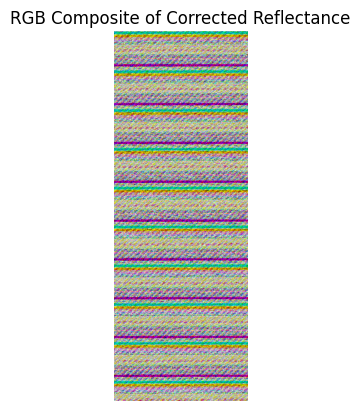

In [84]:
red_band = 30   
green_band = 19 
blue_band = 11  

rgb_image = np.stack([corrected_reflectance[red_band, :, :],
                      corrected_reflectance[green_band, :, :],
                      corrected_reflectance[blue_band, :, :]], axis=-1)

plt.imshow(rgb_image)
plt.title('RGB Composite of Corrected Reflectance')
plt.axis('off')
plt.show()


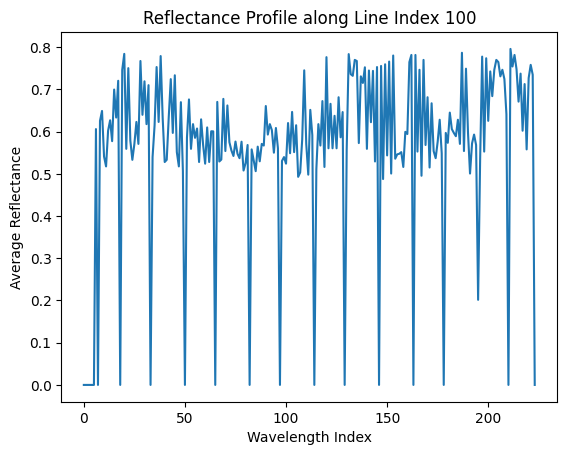

In [85]:
line_index = 99
plt.plot(corrected_reflectance[:, line_index, :].mean(axis=1))
plt.title('Reflectance Profile along Line Index 100')
plt.xlabel('Wavelength Index')
plt.ylabel('Average Reflectance')
plt.show()


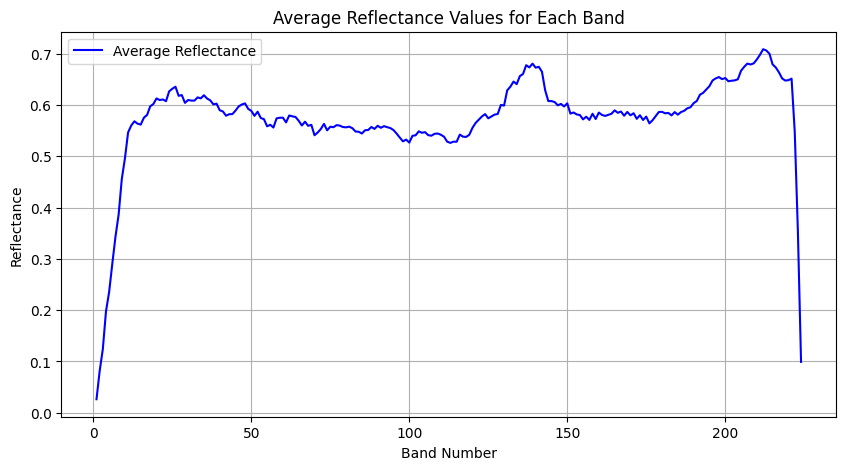

In [86]:
import numpy as np
import matplotlib.pyplot as plt

bands, rows, cols = corrected_reflectance.shape
average_reflectance = []

for band in range(bands):
    band_data = corrected_reflectance[band, :, :]
    mean_reflectance = np.mean(band_data)
    average_reflectance.append(mean_reflectance)

band_numbers = range(1, bands + 1)
plt.figure(figsize=(10, 5))
plt.plot(band_numbers, average_reflectance, label='Average Reflectance', color='b')
plt.xlabel('Band Number')
plt.ylabel('Reflectance')
plt.title('Average Reflectance Values for Each Band')
plt.grid(True)
plt.legend()
plt.show()


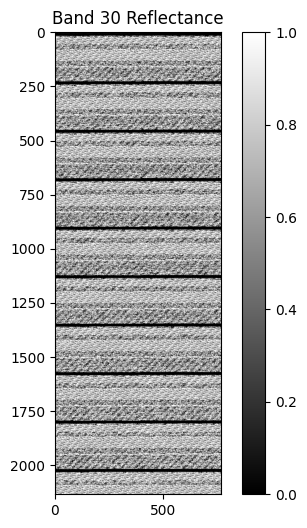

In [149]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(band_reflectance, cmap='gray')
plt.colorbar()
plt.title(f'Band {band_number} Reflectance')
plt.show()


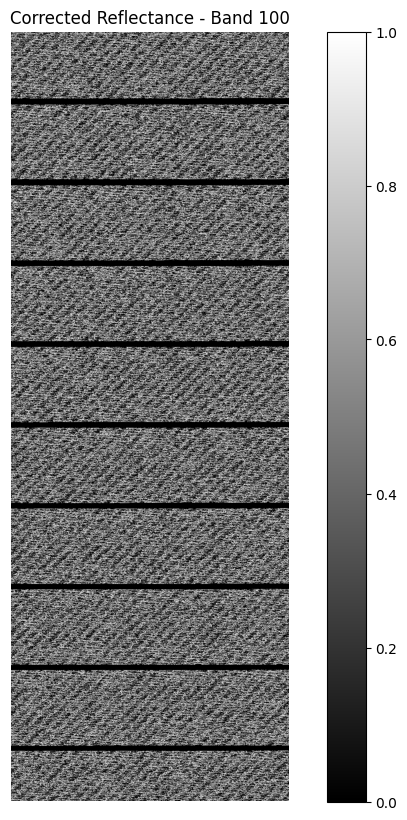

In [92]:
band_number = 100
corrected_band_image = corrected_image[band_number, :, :]
corrected_band_image_normalized = (corrected_band_image - corrected_band_image.min()) / (corrected_band_image.max() - corrected_band_image.min())

plt.figure(figsize=(10, 10))
plt.imshow(corrected_band_image_normalized, cmap='gray')
plt.colorbar()
plt.title(f'Corrected Reflectance - Band {band_number}')
plt.axis('off')
plt.show()


In [88]:
bands, rows, cols = corrected_reflectance.shape

corrected_image = np.zeros_like(radiance_data_normalized, dtype=np.float32)

for b in range(bands):
    corrected_image[b, :, :] = radiance_data_normalized[b, :, :] * corrected_reflectance[b, :, :]

corrected_image_normalized = (corrected_image - corrected_image.min()) / (corrected_image.max() - corrected_image.min())


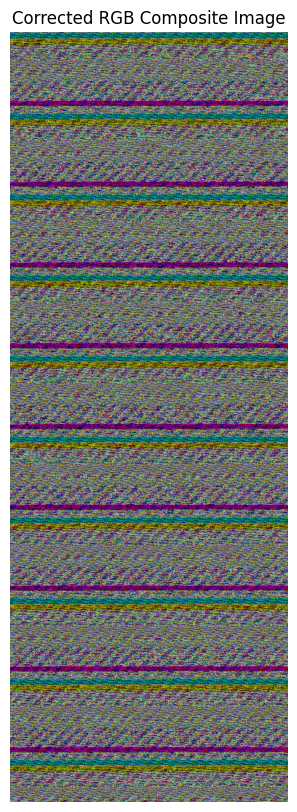

In [89]:
def get_rgb_composite(image, bands=[30, 20, 10]):
    """
    Create an RGB composite from the image data.
    :param image: The image data array with shape (bands, rows, cols)
    :param bands: List of bands to use for RGB channels
    :return: RGB image
    """
    rgb_image = np.zeros((image.shape[1], image.shape[2], 3), dtype=np.float32)
    for i, band in enumerate(bands):
        rgb_image[:, :, i] = image[band, :, :]
    return rgb_image

rgb_bands = [30, 19, 11] 
rgb_corrected_image = get_rgb_composite(corrected_image_normalized, rgb_bands)
plt.figure(figsize=(10, 10))
plt.imshow(rgb_corrected_image)
plt.title('Corrected RGB Composite Image')
plt.axis('off') 
plt.show()
